## Analisis de Gráficos (B)
-------------------------------------------
**Por Nicole Lastra Quiroz** 
- Código de confección propia para el procesamiento de los datos obtenidos del video
- Abril 2023

In [13]:
# Importación de librerías
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Configuración matplotlib
plt.rcParams['savefig.bbox'] = "tight"

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

##### Extracción y limpieza de datos

In [2]:
# Carga de datos
datos = pd.read_csv('datos2.csv', sep = ';')
datos

,V,M,S,Frac
0,36,0,9,0
1,38,0,10,58
2,40,0,12,56
3,40,0,14,54
4,40,0,16,52
...,...,...,...,...
59,99,2,5,10
60,100,2,7,6
61,100,2,9,4
62,100,2,11,2


In [3]:
# Revisión de datos nulos e información básica
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V       64 non-null     int64
 1   M       64 non-null     int64
 2   S       64 non-null     int64
 3   Frac    64 non-null     int64
dtypes: int64(4)
memory usage: 2.1 KB


In [4]:
# Crear nuevo dataframe con columnas de datos necesarias
df = pd.DataFrame(columns = ['velocidad', 'tiempo_s'])

# Definir valores de columnas del nuevo dataframe considerando metricas SI 
df['velocidad'] = round(datos['V']*(1000/3600),1)                            # velocidad ahora en metros / segundos
df['tiempo_s']  = round(datos['M']*60 + datos['S']+ datos['Frac']/60,1)      # tiempo ahora en s

# Visualizar resumen de del dataframe
df


,velocidad,tiempo_s
0,10.0,9.0
1,10.6,11.0
2,11.1,12.9
3,11.1,14.9
4,11.1,16.9
...,...,...
59,27.5,125.2
60,27.8,127.1
61,27.8,129.1
62,27.8,131.0


In [5]:
# Revisión de estadistica básica
df.describe()

,velocidad,tiempo_s
count,64.000000,64.000000
mean,18.995312,70.996875
std,5.080133,36.649922
min,10.000000,9.000000
25%,14.925000,40.000000
50%,19.400000,71.000000
75%,23.225000,102.000000
max,27.800000,133.000000


##### Gráfica inicial

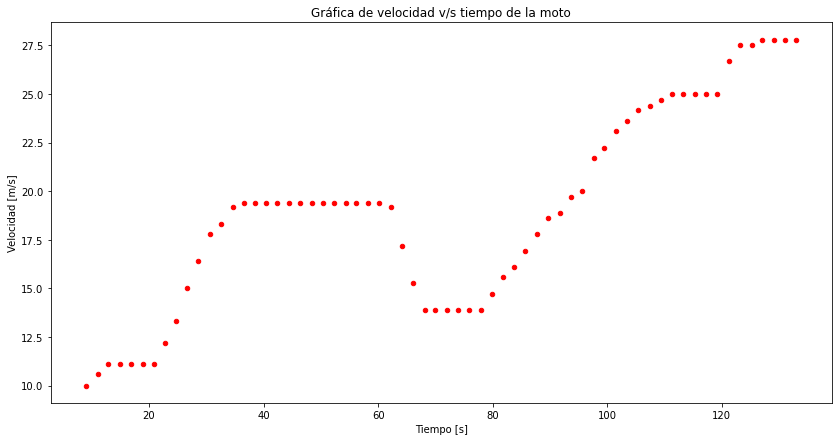

In [6]:
# Gráfico velocidad vs tiempo
fig, ax = plt.subplots(figsize =(14, 7))

# Tipo de gráfico
df.plot(
    x    = 'tiempo_s',
    y    = 'velocidad',
    c    = 'red',
    kind = "scatter",
    ax   = ax
)

# Título, ejess y otros
ax.set_title('Gráfica de velocidad v/s tiempo de la moto');
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.show()

##### Definición de intervalos de acuerdo a la gráfica

In [7]:
# Crear columna "intervalo" con valor predeterminado 0
df['intervalo'] = 0

# Asignar valor correspondiente a cada intervalo (según lo observado en la gráfica)
df.loc[0:2,   'intervalo'] = 1
df.loc[3:6,   'intervalo'] = 2
df.loc[7:14,  'intervalo'] = 3
df.loc[15:26, 'intervalo'] = 4
df.loc[27:30, 'intervalo'] = 5
df.loc[31:35, 'intervalo'] = 6
df.loc[36:52, 'intervalo'] = 7
df.loc[53:56, 'intervalo'] = 8
df.loc[57:60, 'intervalo'] = 9
df.loc[61:63, 'intervalo'] = 10

# Visualizar 6 ejemplos de filas
df.sample(6)

,velocidad,tiempo_s,intervalo
25,19.4,58.2,4
0,10.0,9.0,1
7,12.2,22.8,3
62,27.8,131.0,10
45,21.7,97.6,7
49,24.2,105.4,7


##### Gráfica de ajustes lineales y área abarcada por intervalo

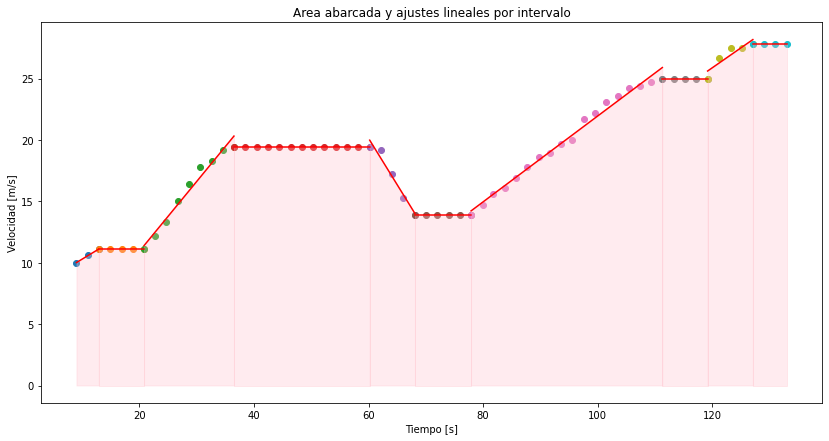

In [8]:
# Crear una lista vacía para almacenar los ajustes por intervalo
fig, ax = plt.subplots(figsize=(14, 7))

# Crear listas vacías para almacenar datos respectivos por intervalo
inicio_i   = []
fin_i      = []
pendiente  = []
intercepto = []
area_i     = []
v_i        = []

# Iterar por cada intervalo y obtener los datos
for i in range(10):
  
    if  i == 0:

        intervalo        = df.loc[df['intervalo'] == i+1].index
        inicio           = intervalo.min()
        fin              = intervalo.max()
        x                = df.loc[inicio:fin, 'tiempo_s']
        y                = df.loc[inicio:fin, 'velocidad']


        # Calcular los valores promedio de x e y
        x_promedio = x.mean()
        y_promedio = y.mean()
        
        # Calcular la pendiente y la ordenada al origen de la recta de ajuste
        m = sum((x - x_promedio) * (y - y_promedio)) / sum((x - x_promedio) ** 2)
        b = y_promedio - m * x_promedio

    else :
        intervalo        = df.loc[df['intervalo'] == i+1].index
        inicio           = intervalo.min()
        fin              = intervalo.max()
        x                = df.loc[inicio-1:fin, 'tiempo_s']
        y                = df.loc[inicio-1:fin, 'velocidad']
        

        # Calcular de los valores promedio de x e y
        x_promedio = x.mean()
        y_promedio = y.mean()
        
        # Calcular de la pendiente y la ordenada al origen de la recta de ajuste
        m = sum((x - x_promedio) * (y - y_promedio)) / sum((x - x_promedio) ** 2)
        b = y_promedio - m * x_promedio
        
    # variables auxiliares
    tiempo_inicio    = x.min()
    tiempo_fin       = x.max()
    velocidad_inicio = y.min()

    # Calculo de área bajo la curva
    area = np.trapz(y, x)

    # almacenaminto de los datos en las listas
    inicio_i.append(x.min())
    fin_i.append(x.max())
    pendiente.append(m)
    intercepto.append(b)
    area_i.append(area)
    v_i.append(velocidad_inicio + m * (tiempo_fin - tiempo_inicio))

    
    # Grafica la recta de ajuste
    plt.scatter(x, y)
    plt.plot(x, m * x + b, 'r-')
    plt.fill_between(x, m * x + b, color = 'pink', 
                                   alpha = 0.3
                                   )
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Velocidad [m/s]')
    plt.title('Area abarcada y ajustes lineales por intervalo')
    plt.grid()
   

##### Registros de velocidad, aceleración, área y otros, para cada intervalo

In [9]:
data = pd.DataFrame(inicio_i, columns = ['Tiempo_inicial'])
data['Tiempo_final']        = fin_i
data['Pendiente']           = [round (p,1) for p in pendiente]
data['Intercepto']          = [round (p,1) for p in intercepto]
data['Ajuste_lineal']       = ''
data['aceleración']         = [round (p,1) for p in pendiente]
data['Velocidad_intervalo'] = [round (p,1) for p in v_i]
data['Area_intervalo']      = [round (p,1) for p in area_i]

# Iterar sobre cada fila del DataFrame
for index, row in data.iterrows():
    # Obtener la pendiente y ordenada al origen de la fila actual
    m = row['Pendiente']
    b = row['Intercepto']
    
    # Construir la función lineal correspondiente
    ajuste_lineal = f'{m:.1f}x+{b:.1f}'
    
    # Asignar el valor de ajuste lineal a la columna correspondiente
    data.at[index, 'Ajuste_lineal'] = ajuste_lineal

data


,Tiempo_inicial,Tiempo_final,Pendiente,Intercepto,Ajuste_lineal,aceleración,Velocidad_intervalo,Area_intervalo
0,9.0,12.9,0.3,7.5,0.3x+7.5,0.3,11.1,41.2
1,12.9,20.8,0.0,11.1,0.0x+11.1,0.0,11.1,87.7
2,20.8,36.5,0.6,-0.4,0.6x+-0.4,0.6,20.0,250.1
3,36.5,60.2,0.0,19.4,0.0x+19.4,0.0,19.4,459.8
4,60.2,68.1,-0.8,65.5,-0.8x+65.5,-0.8,7.9,134.9
5,68.1,77.9,0.0,13.9,0.0x+13.9,0.0,13.9,136.2
6,77.9,111.3,0.3,-13.0,0.3x+-13.0,0.3,25.6,671.1
7,111.3,119.2,0.0,25.0,0.0x+25.0,0.0,25.0,197.5
8,119.2,127.1,0.3,-13.0,0.3x+-13.0,0.3,27.6,213.4
9,127.1,133.0,0.0,27.8,0.0x+27.8,0.0,27.8,164.0


##### Gráficas separadas por intervalo (incluyen $R^2$)

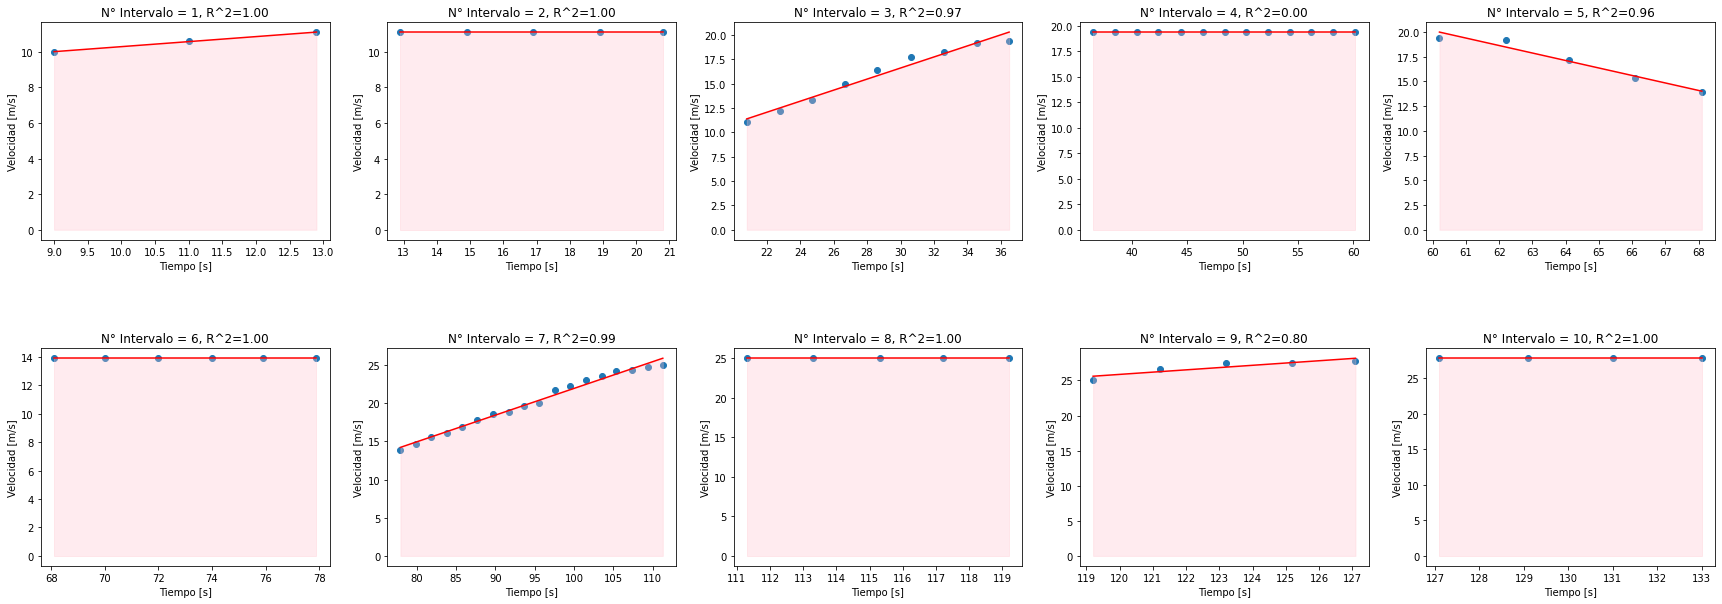

In [10]:
# Crear una lista vacía para almacenar los valores de r^2 por intervalo
r2_por_intervalo = []

# Crear una grilla de subplots de 3 filas y 4 columnas
fig, axs = plt.subplots(2, 5, figsize = (30, 10))

# Iterar por cada intervalo y obtener los datos
for i, ax in zip(range(10), axs.flat):
  
    if  i == 0:

        intervalo        = df.loc[df['intervalo'] == i+1].index
        inicio           = intervalo.min()
        fin              = intervalo.max()
        x                = df.loc[inicio:fin, 'tiempo_s']
        y                = df.loc[inicio:fin, 'velocidad']

        # Calcular los valores promedio de x e y
        x_promedio = x.mean()
        y_promedio = y.mean()
        

    else :
        intervalo        = df.loc[df['intervalo'] == i+1].index
        inicio           = intervalo.min()
        fin              = intervalo.max()
        x                = df.loc[inicio-1:fin, 'tiempo_s']
        y                = df.loc[inicio-1:fin, 'velocidad']
        

        # Calcular los valores promedio de x e y
        x_promedio = x.mean()
        y_promedio = y.mean()
        
    # Calcular la pendiente y la ordenada al origen de la recta de ajuste
    m = sum((x - x_promedio) * (y - y_promedio)) / sum((x - x_promedio) ** 2)
    b = y_promedio - m * x_promedio

    # Calcular el valor de r^2
    y_pred = (m * x + b) 
    r2 = r2_score(y, y_pred)

        # Calcular el área bajo la curva
    area = np.trapz(y, x)

    # Agregar los coeficientes del ajuste a la lista de ajustes
    r2_por_intervalo.append(r2)
   
    
    # Graficar la recta de ajuste en el subplot correspondiente
    ax.scatter(x, y)
    ax.plot(x, y_pred, 'r-')
    ax.fill_between(x, y_pred, color = 'pink', 
                               alpha = 0.3
                               )
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Velocidad [m/s]')
    ax.set_title(f'N° Intervalo = {i+1}, R^2={r2:.2f}')

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(hspace = 0.5, 
                    wspace = 0.2,
                    )


In [11]:
# Crear una nueva columna para los r^2
data['R2'] = [round (p,3) for p in r2_por_intervalo]

# Visualización
data

,Tiempo_inicial,Tiempo_final,Pendiente,Intercepto,Ajuste_lineal,aceleración,Velocidad_intervalo,Area_intervalo,R2
0,9.0,12.9,0.3,7.5,0.3x+7.5,0.3,11.1,41.2,0.999
1,12.9,20.8,0.0,11.1,0.0x+11.1,0.0,11.1,87.7,1.000
2,20.8,36.5,0.6,-0.4,0.6x+-0.4,0.6,20.0,250.1,0.971
3,36.5,60.2,0.0,19.4,0.0x+19.4,0.0,19.4,459.8,0.000
4,60.2,68.1,-0.8,65.5,-0.8x+65.5,-0.8,7.9,134.9,0.958
5,68.1,77.9,0.0,13.9,0.0x+13.9,0.0,13.9,136.2,1.000
6,77.9,111.3,0.3,-13.0,0.3x+-13.0,0.3,25.6,671.1,0.988
7,111.3,119.2,0.0,25.0,0.0x+25.0,0.0,25.0,197.5,1.000
8,119.2,127.1,0.3,-13.0,0.3x+-13.0,0.3,27.6,213.4,0.795
9,127.1,133.0,0.0,27.8,0.0x+27.8,0.0,27.8,164.0,1.000


##### Variación total de x(t)


In [12]:
Area_total = data['Area_intervalo'].sum()
print(f'Variación total de x(t):{round(Area_total,1)} metros')

Variación total de x(t):2355.9 metros
